In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("http://facweb.cs.depaul.edu/mobasher/classes/csc478/Data/bank_data.csv")


In [6]:
print("Data Shape ",data.shape)
print(data.head(3))
print(data.info())

Data Shape  (600, 12)
        id  age   income  children  gender      region married  car  \
0  ID12101   48  17546.0         1  FEMALE  INNER_CITY      NO   NO   
1  ID12102   40  30085.1         3    MALE        TOWN     YES  YES   
2  ID12103   51  16575.4         0  FEMALE  INNER_CITY     YES  YES   

  savings_acct current_acct mortgage  pep  
0           NO           NO       NO  YES  
1           NO          YES      YES   NO  
2          YES          YES       NO   NO  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
id              600 non-null object
age             600 non-null int64
income          600 non-null float64
children        600 non-null int64
gender          600 non-null object
region          600 non-null object
married         600 non-null object
car             600 non-null object
savings_acct    600 non-null object
current_acct    600 non-null object
mortgage        600 non-null object
pep             6

In [9]:
data.columns

Index(['id', 'age', 'income', 'children', 'gender', 'region', 'married', 'car',
       'savings_acct', 'current_acct', 'mortgage', 'pep'],
      dtype='object')

In [4]:
data.describe()


,age,income,children
count,600.000000,600.000000,600.000000
mean,42.395000,27524.031217,1.011667
std,14.424947,12899.468246,1.056752
min,18.000000,5014.210000,0.000000
25%,30.000000,17264.500000,0.000000
50%,42.000000,24925.300000,1.000000
75%,55.250000,36172.675000,2.000000
max,67.000000,63130.100000,3.000000


#### 2.a Load and preprocess the data using Pandas or similar tools. Specifically, you need to separate the target attribute ("pep") from the portion of the data to be used for training and testing. You will need to convert the selected dataset into the Standard Spreadsheet format (i.e., convert categorical attributes into numeric by creating dummy variables). Finally, split the transformed data into training and test sets (using 80%-20% randomized split). [Review Jupyter Notebooks from class to see examples of how to perform these tasks.]

In [12]:
## get the target attribute
vs_target = data['pep']
vs_target.head()

0    YES
1     NO
2     NO
3     NO
4     NO
Name: pep, dtype: object

In [13]:
## remove pep from the data
data_columns = ['id', 'age', 'income', 'children', 'gender', 'region', 'married', 'car','savings_acct', 'current_acct', 'mortgage']
vs_record = data[data_columns]
vs_record.shape

(600, 11)

In [16]:
## transform the dataset into standard spreadsheet format
categorical_columns = ['gender', 'region', 'married', 'car','savings_acct', 'current_acct', 'mortgage']
vs_record_ssf=pd.get_dummies(vs_record[categorical_columns])
vs_record_ssf.head()

,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,married_YES,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES
0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0
1,0,1,0,0,0,1,0,1,0,1,1,0,0,1,0,1
2,1,0,1,0,0,0,0,1,0,1,0,1,0,1,1,0
3,1,0,0,0,0,1,0,1,1,0,1,0,0,1,1,0
4,1,0,0,1,0,0,0,1,1,0,0,1,1,0,1,0


In [28]:
%%time

## split the transformed data into training and test sets (using 80%-20% randomized split)
from sklearn.model_selection import train_test_split
vs_train, vs_test, vs_target_train, vs_target_test = train_test_split(vs_record_ssf, vs_target, test_size=0.2, random_state=33)


Wall time: 2 ms


In [29]:
print("Shape {}. Test Data is".format(vs_test.shape))
vs_test[0:5]

Shape (120, 16). Test Data is


,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,married_YES,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES
456,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1
366,1,0,1,0,0,0,1,0,0,1,1,0,0,1,1,0
131,0,1,0,1,0,0,0,1,1,0,0,1,0,1,0,1
448,0,1,0,1,0,0,0,1,0,1,0,1,1,0,1,0
337,0,1,1,0,0,0,0,1,0,1,0,1,1,0,0,1


In [30]:
print("Shape {}. Train Data is".format(vs_train.shape))
vs_test[0:5]

Shape (480, 16). Train Data is


,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,married_YES,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES
456,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1
366,1,0,1,0,0,0,1,0,0,1,1,0,0,1,1,0
131,0,1,0,1,0,0,0,1,1,0,0,1,0,1,0,1
448,0,1,0,1,0,0,0,1,0,1,0,1,1,0,1,0
337,0,1,1,0,0,0,0,1,0,1,0,1,1,0,0,1


#### 2.b Run scikit-learn's KNN classifier on the test set. Note: in the case of KNN, you should first normalize the data so that all attributes are in the same scale (normalize so that the values are between 0 and 1). Generate the confusion matrix (visualize it using Matplotlib), as well as the classification report. Experiment with different values of K and the weight parameter (i.e., with or without distance weighting) for KNN to see if you can improve accuracy (you do not need to provide the details of all of your experimentation, but provide a short discussion on what parameters worked best as well as your final results).

In [31]:
from sklearn import preprocessing

In [32]:
min_max_scaler = preprocessing.MinMaxScaler().fit(vs_train)

In [36]:
#normalize the train data so the values are between 0 and 1
vs_train_norm = min_max_scaler.transform(vs_train)
vs_train_norm = pd.DataFrame(vs_train_norm, columns=vs_train.columns, index=vs_train.index)

vs_train_norm.head()

,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,married_YES,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES
381,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
86,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
83,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
523,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0


In [38]:

#normalize the test data so the values are between 0 and 1

vs_test_norm = min_max_scaler.transform(vs_test)
vs_test_norm = pd.DataFrame(vs_test_norm, columns=vs_test.columns, index=vs_test.index)

vs_test_norm.head()



,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,married_YES,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES
456,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
366,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
131,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
448,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
337,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0


In [39]:
from sklearn import neighbors, tree, naive_bayes

In [51]:
n_neighbors = 5

knnclf = neighbors.KNeighborsClassifier(n_neighbors)
knnclf.fit(vs_train_norm, vs_target_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [52]:
knnpreds_test = knnclf.predict(vs_test_norm)

In [53]:
print(knnpreds_test)

['YES' 'YES' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES'
 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES'
 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES'
 'YES' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'YES' 'NO' 'YES'
 'NO' 'NO' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO'
 'YES' 'YES' 'YES' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'YES' 'YES' 'NO' 'YES' 'NO'
 'NO' 'YES' 'YES' 'NO' 'YES' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES'
 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES'
 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO']


In [54]:
from sklearn.metrics import classification_report

In [55]:
print(classification_report(vs_target_test, knnpreds_test))

             precision    recall  f1-score   support

         NO       0.62      0.67      0.64        66
        YES       0.55      0.50      0.52        54

avg / total       0.59      0.59      0.59       120



In [56]:
from sklearn.metrics import confusion_matrix

In [57]:
knncm = confusion_matrix(vs_target_test, knnpreds_test)
print(knncm)

[[44 22]
 [27 27]]


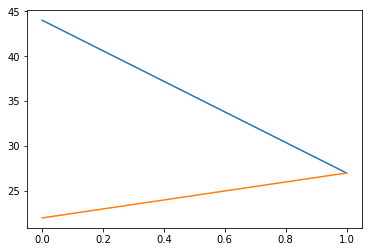

In [58]:
plt.plot(knncm)